# **Introduction**

The dataset was created by Angeliki Xifara (angxifara '@' gmail.com, Civil/Structural Engineer) and was processed by Athanasios Tsanas (tsanasthanasis '@' gmail.com, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).

Data Set Information:

We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.

Attribute Information:

The dataset contains eight attributes (or features, denoted by X1…X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

Specifically:
X1 Relative Compactness

X2 Surface Area

X3 Wall Area

X4 Roof Area

X5 Overall Height

X6 Orientation

X7 Glazing Area

X8 Glazing Area Distribution

y1 Heating Load

y2 Cooling Load

## *Reading data and creating required columns*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/energy efficiency.csv')

# Exploratory Data Analysis


In [ ]:
# Screening the first 5 columns of the dataset
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28


In [ ]:
#Renaming the column names
df.columns= ["Relative Compactness", "Surface Area", "Wall Area", "Roof Area", "Overall Height", "Orientation", 
               "Glazing Area", "Glazing Area Distribution", "Heating Load", "Cooling Load"]

In [ ]:
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28


In [ ]:
#Checking the shape of the data  
df.shape

(1296, 10)

In [ ]:
#Checking about the null values the data 
pd.isnull(df).sum()

Relative Compactness         528
Surface Area                 528
Wall Area                    528
Roof Area                    528
Overall Height               528
Orientation                  528
Glazing Area                 528
Glazing Area Distribution    528
Heating Load                 528
Cooling Load                 528
dtype: int64

In [ ]:
#Dropping the na values of the columns 
data= df.dropna()

# Feature Engineering 

In [ ]:
#Adding column overall load 
data['Overall Load'] = data['Heating Load'] + data['Cooling Load'] 
data.head() 

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load,Overall Load
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33,36.88
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33,36.88
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33,36.88
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33,36.88
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28,49.12


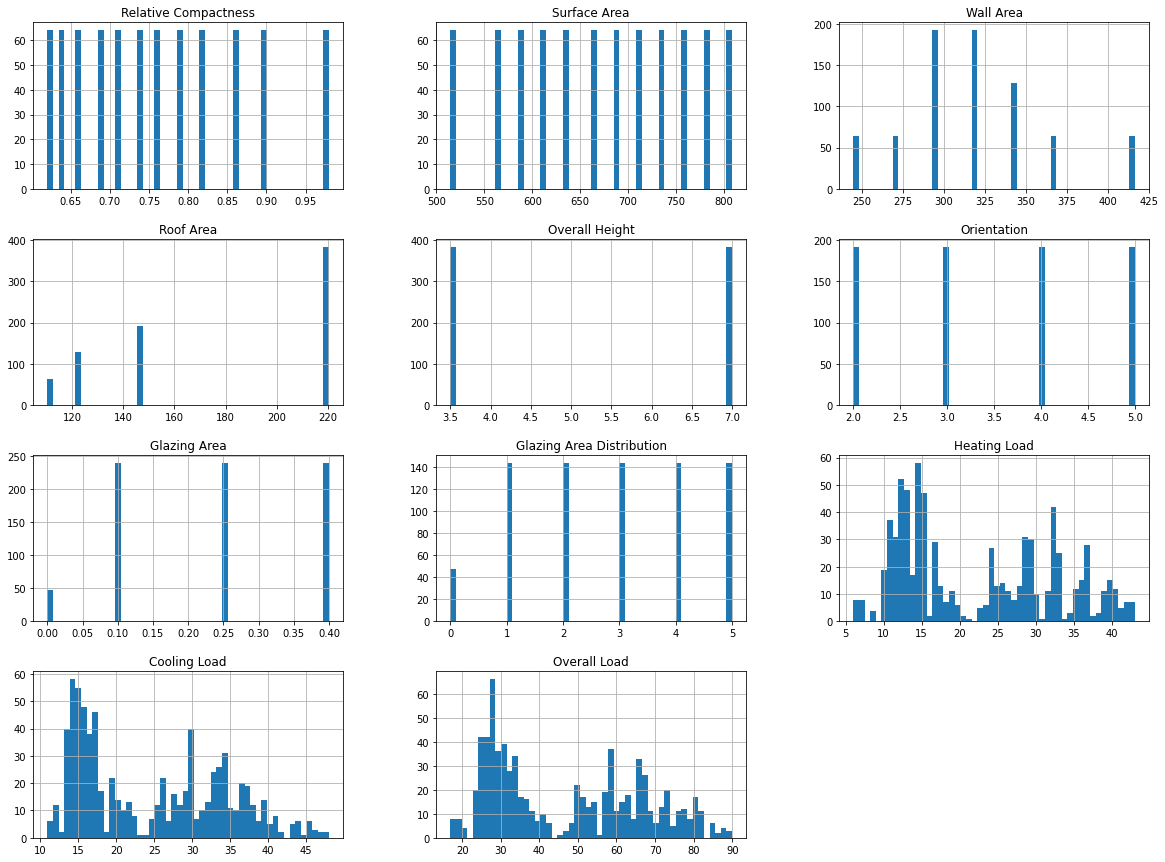

In [ ]:
# poltting histogram 
data.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
#checking correlation
data.corr()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load,Overall Load
Relative Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339,0.631950
Surface Area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999,-0.669389
Wall Area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117,0.444502
Roof Area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547,-0.867423
Overall Height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889431,0.895785,0.897945
Orientation,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290,0.005637
Glazing Area,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269841,0.207505,0.241048
Glazing Area Distribution,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525,0.069911
Heating Load,6.222722e-01,-6.581202e-01,4.556712e-01,-8.618283e-01,8.894307e-01,-2.586534e-03,2.698410e-01,8.736759e-02,1.000000,0.975862,0.994299
Cooling Load,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000,0.993585


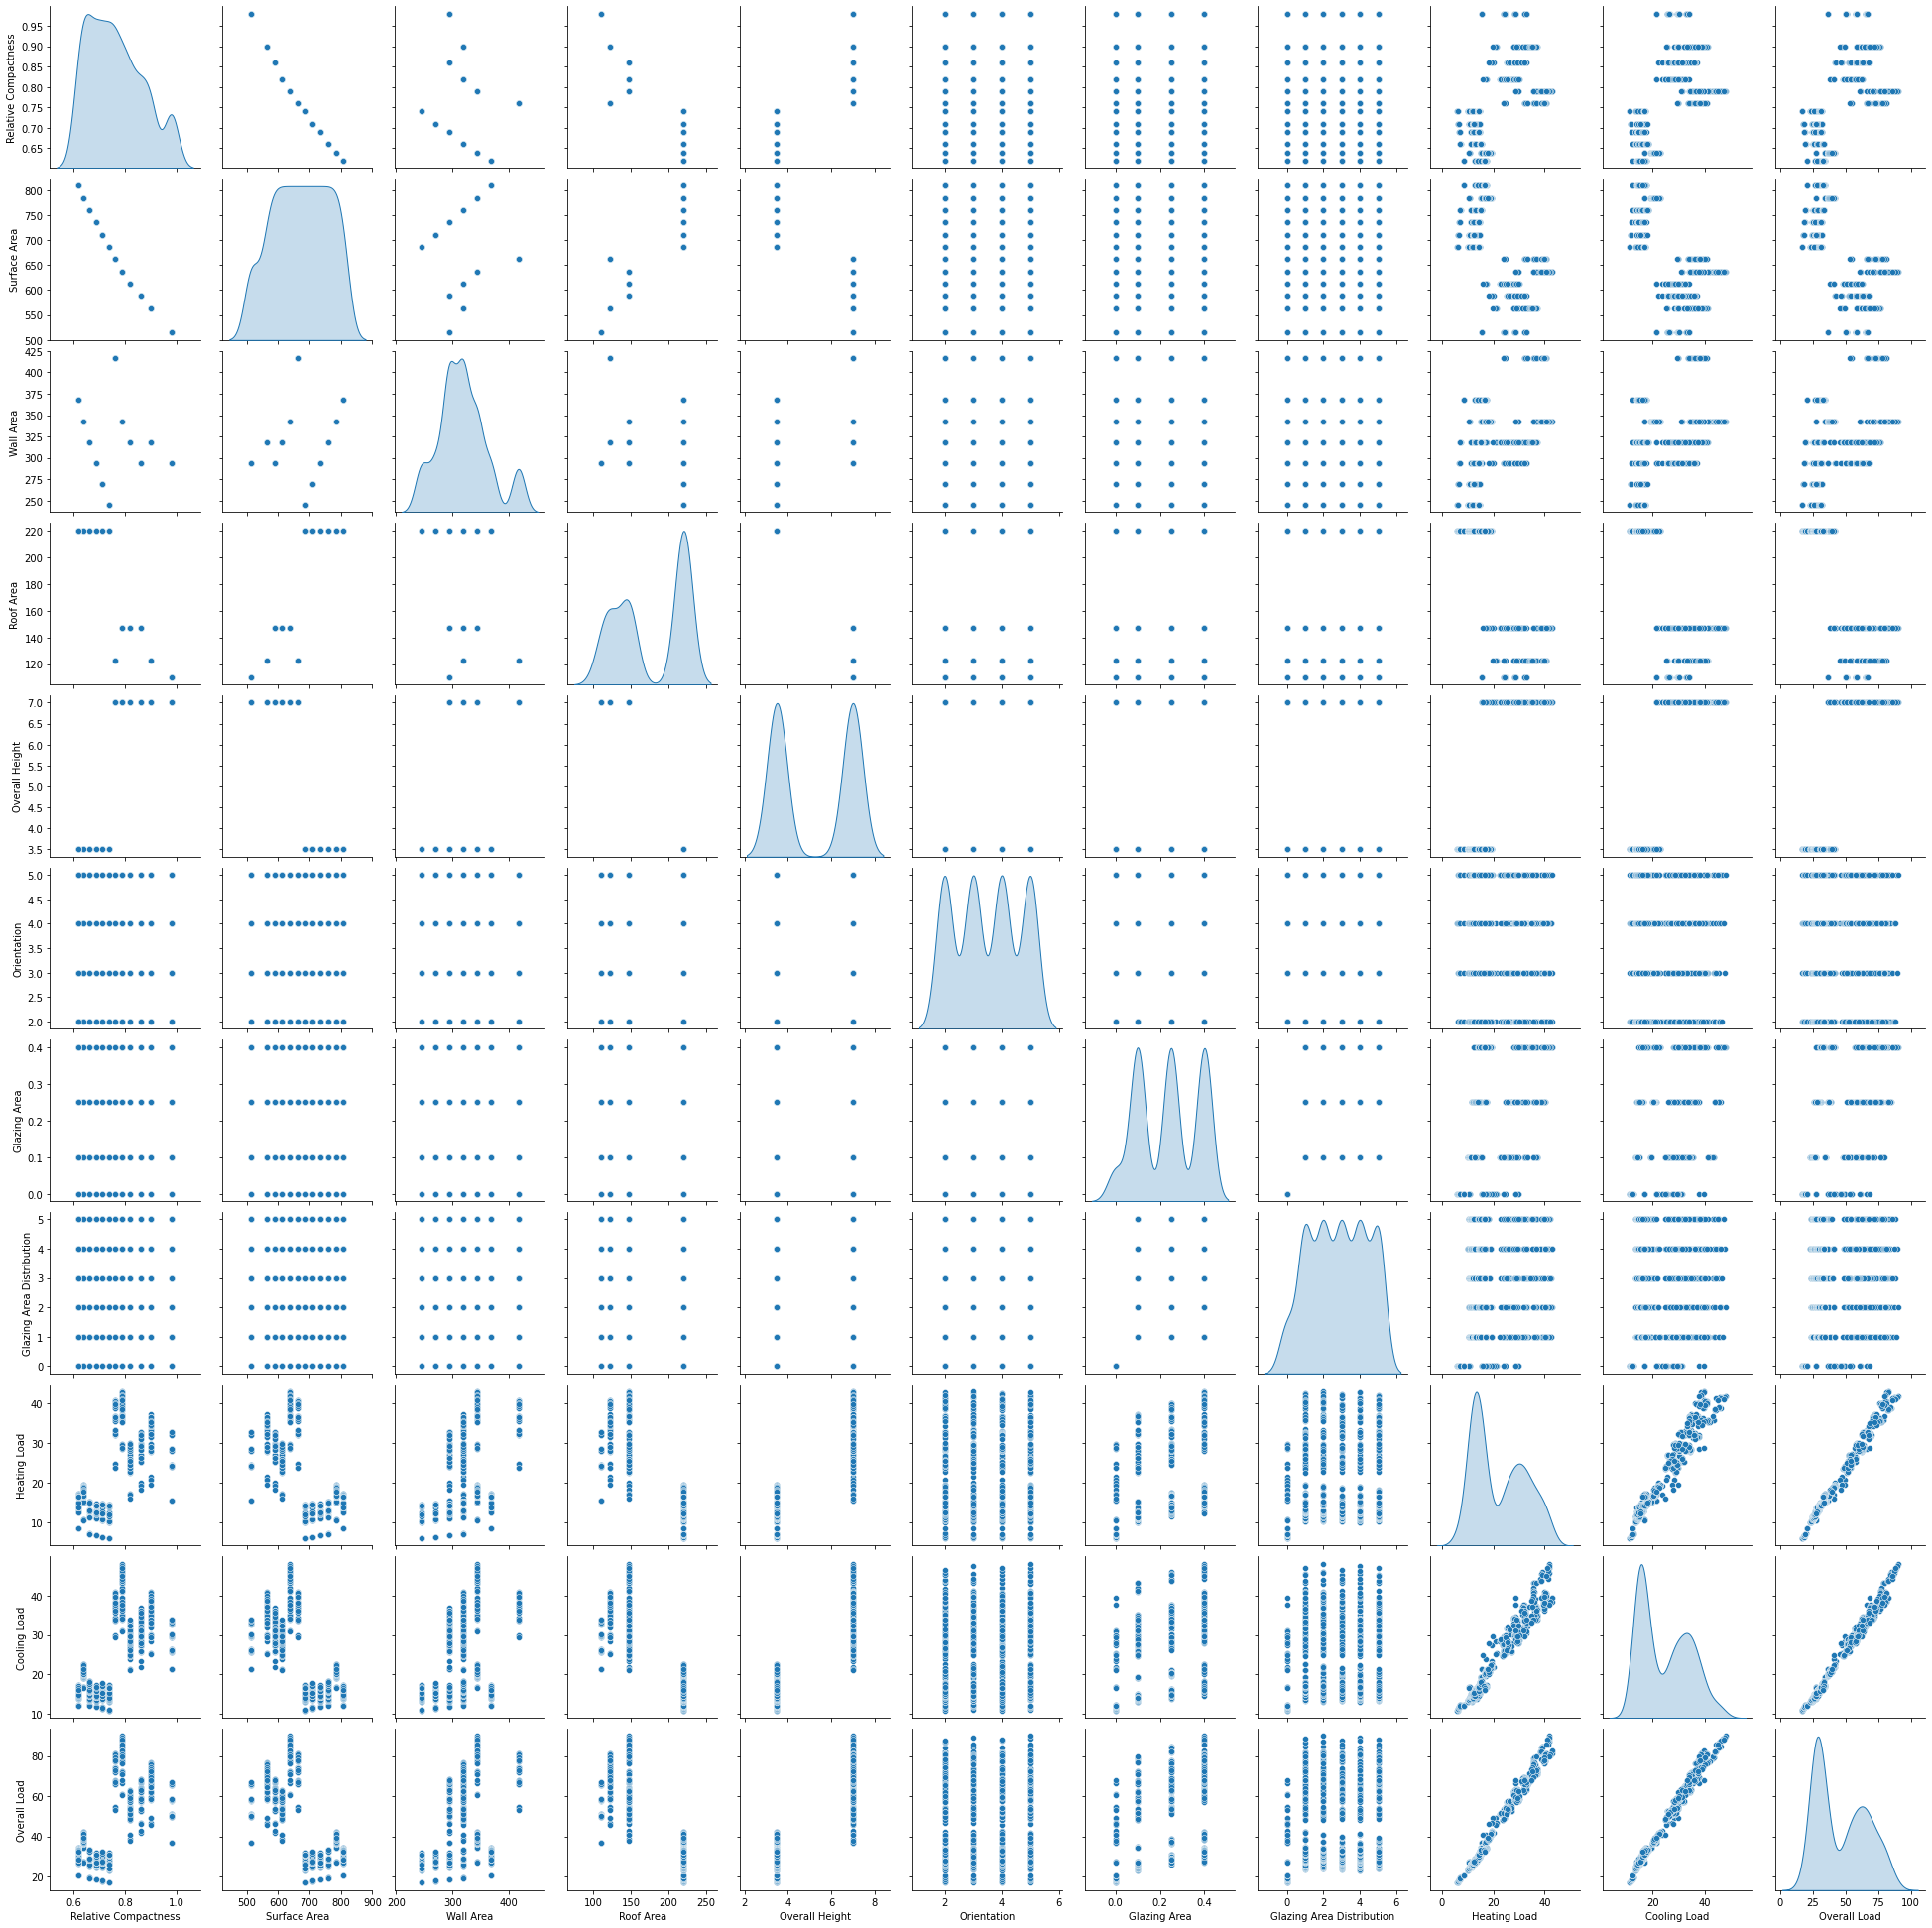

In [ ]:
#Pairplot checking
sns.pairplot(data, kind="scatter", diag_kind='kde')

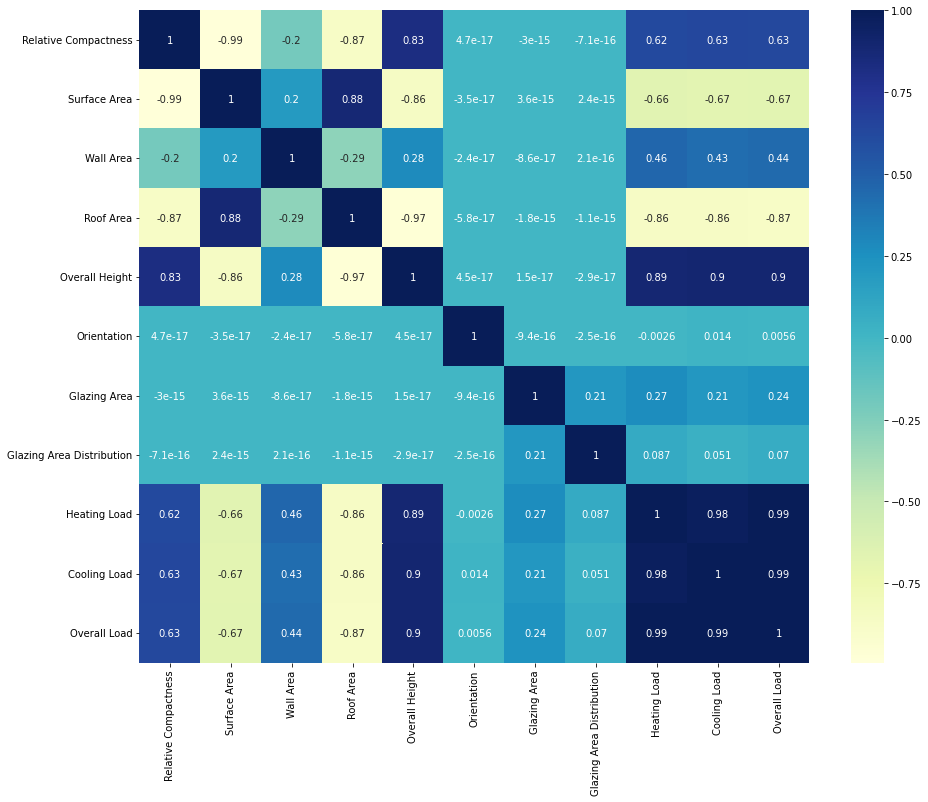

In [ ]:
#heatmap
plt.subplots(figsize=(15,12))
corr = data.corr()
sns.heatmap(corr, annot=True,cmap="YlGnBu")

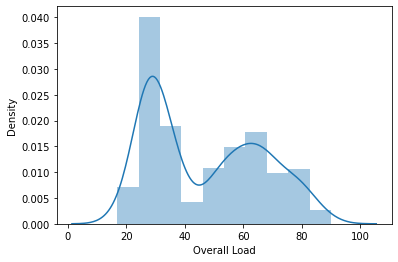

In [ ]:
# Trend of  overall trend
sns.distplot(data['Overall Load'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f708c244050>,
 'caps': [<matplotlib.lines.Line2D at 0x7f708c244ad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f708c23e110>],
 'medians': [<matplotlib.lines.Line2D at 0x7f708c1cd5d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f708c1cdb10>],
 'means': []}

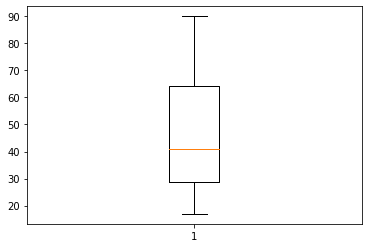

In [ ]:
# Checked Out for outliers
plt.boxplot(data['Overall Load'])

In [ ]:
# checking for the quantiles
data['Overall Load'].quantile([.25, .50, 0.75])

0.25    28.750
0.50    40.970
0.75    64.335
Name: Overall Load, dtype: float64

Adding column for classes for efficiency

In [ ]:
data['Efficiency'] = np.where(data['Overall Load']<29, 'Low', np.where(data['Overall Load']<64, 'Average', 'High'))
data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load,Overall Load,Efficiency
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33,36.88,Average
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33,36.88,Average
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33,36.88,Average
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33,36.88,Average
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28,49.12,Average


In [ ]:
data.shape

(768, 12)

In [ ]:
data['Efficiency'].value_counts()

Average    368
Low        207
High       193
Name: Efficiency, dtype: int64

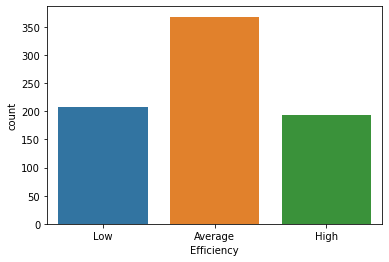

In [ ]:
sns.countplot(x='Efficiency', data=data, order=['Low','Average','High'])

## Creating different datasets for different Y variables

## Data set for heating load

In [ ]:
data_heat = data.drop(columns=['Cooling Load','Overall Load','Efficiency'])

In [ ]:
data_heat.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84


In [ ]:
data_heat.shape

(768, 9)

## Data set for cooling load

In [ ]:
data_cool = data.drop(columns=['Heating Load','Overall Load','Efficiency'])
data_cool.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,28.28


In [ ]:
data_cool.shape

(768, 9)

## Data set for efficiency classification

In [ ]:
data_eff = data.drop(columns=['Cooling Load','Heating Load','Overall Load'])
data_eff.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Efficiency
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,Average
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,Average
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,Average
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,Average
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,Average


## Models for predicting heating load

## Data preprocessing

In [ ]:
X = data_heat.drop(columns=['Heating Load'])
y= data_heat['Heating Load']

In [ ]:
y.head()

0    15.55
1    15.55
2    15.55
3    15.55
4    20.84
Name: Heating Load, dtype: float64

In [ ]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
y_predict = lr.predict(X_train)
print('Accuracy of Linear Regression on training set: {:.2f}'
     .format(lr.score(X_train, y_train)))
print('Accuracy of Linear Regression on test set: {:.2f}'
     .format(lr.score(X_test, y_test)))

Accuracy of Linear Regression on training set: 0.92
Accuracy of Linear Regression on test set: 0.91


In [ ]:
print("lr.coef_: {}".format(lr.coef_))

print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [-23.22208794  -9.12209329   0.95163216 -12.90294941  14.06618023
  -0.15025552   7.85913976   1.18321625]
lr.intercept_: 31.525721890638973


## KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [2,4,6,8,10,12]}
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn,param_grid,cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'n_neighbors': 8}

In [ ]:
knn = KNeighborsRegressor(n_neighbors=8).fit(X_train, y_train)
print('Accuracy of Knn Regressor on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of Knn Regressor on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of Knn Regressor on training set: 0.94
Accuracy of Knn Regressor on test set: 0.92


## Ridge

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train,y_train)
param_grid = {'alpha':[0.01, 1, 5, 10, 100]}
grid_search = GridSearchCV(ridge, param_grid, cv = 5)
grid_search.fit(X_train, y_train)
print('Best parameters: {}'.format(grid_search.best_params_))

Best parameters: {'alpha': 0.01}


In [ ]:
ridge = Ridge(alpha=0.01).fit(X_train, y_train)
print('Accuracy of Ridge Regressor on training set: {:.2f}'
     .format(ridge.score(X_train, y_train)))
print('Accuracy of Ridge Regressor on test set: {:.2f}'
     .format(ridge.score(X_test, y_test)))

Accuracy of Ridge Regressor on training set: 0.92
Accuracy of Ridge Regressor on test set: 0.91


## Lasso

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(max_iter = 10000).fit(X_train,y_train)
param_grid = {'alpha':[0.01, 1, 5, 10, 100]}
grid_search = GridSearchCV(lasso, param_grid, cv = 5)
grid_search.fit(X_train, y_train)
print('Best parameters: {}'.format(grid_search.best_params_))

Best parameters: {'alpha': 0.01}


In [ ]:
lasso = Lasso(max_iter = 10000, alpha=0.01).fit(X_train,y_train)
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))
print('Accuracy of Lasso Regressor on training set: {:.2f}'
     .format(lasso.score(X_train, y_train)))
print('Accuracy of Lasso Regressor on test set: {:.2f}'
     .format(lasso.score(X_test, y_test)))

Number of features used: 7
Accuracy of Lasso Regressor on training set: 0.91
Accuracy of Lasso Regressor on test set: 0.91


In [ ]:
print('Features with non-zero weight (sorted by absolute magnitude):')
for e in sorted (list(zip(list(X), lasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Features with non-zero weight (sorted by absolute magnitude):
	Overall Height, 17.137
	Relative Compactness, -8.868
	Glazing Area, 7.841
	Roof Area, -5.615
	Wall Area, 3.758
	Glazing Area Distribution, 1.114
	Orientation, -0.047


## Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
print("X Train Polynomial Shape: - {}".format(X_train_poly.shape))
print("X Test Polynomial Shape: - {}".format(X_test_poly.shape))

X Train Polynomial Shape: - (576, 45)
X Test Polynomial Shape: - (192, 45)


In [ ]:
lr = LinearRegression().fit(X_train_poly, y_train)
predict_lr= lr.predict(X_test_poly)
print('(poly deg 2) R-squared score (training): {}'
     .format(lr.score(X_train_poly, y_train)))
print('(poly deg 2) R-squared score (test): {}\n'
     .format(lr.score(X_test_poly, y_test)))

(poly deg 2) R-squared score (training): 0.9951496146283607
(poly deg 2) R-squared score (test): 0.994150513932381



##### Addition of many polynomial features often leads to overfitting, so we often use polynomial features in combination with regression that has a regularization penalty, like ridge regression

## Polynomial with Ridge

In [ ]:
ridge = Ridge().fit(X_train_poly, y_train)
print('(poly deg 2 + ridge) R-squared score (training): {}'
     .format(ridge.score(X_train_poly, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {}'
     .format(ridge.score(X_test_poly, y_test)))

(poly deg 2 + ridge) R-squared score (training): 0.9367331731420391
(poly deg 2 + ridge) R-squared score (test): 0.9362546524923423


## Linear SVR

In [ ]:
from sklearn.svm import LinearSVR
lsvr = LinearSVR(random_state=10).fit(X_train, y_train)
param_grid = {'C': [0.01,0.1,1,10,100]}
lsvr=LinearSVR()
grid_search = GridSearchCV(lsvr,param_grid,cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 10}

In [ ]:
lsvr=LinearSVR(C=10).fit(X_train, y_train)
print('Accuracy of Linear SVR classifier on training set: {:.2f}'
     .format(lsvr.score(X_train, y_train)))
print('Accuracy of Linear SVR classifier on test set: {:.2f}'
     .format(lsvr.score(X_test, y_test)))

Accuracy of Linear SVR classifier on training set: 0.91
Accuracy of Linear SVR classifier on test set: 0.91


## SVM Regressor

In [ ]:
from sklearn.svm import SVR
param_grid = {'C': [0.01,0.1,1,10,100], 'epsilon': [0.01,0.1,1,10,100]}
svr = SVR()
grid_search = GridSearchCV(svr,param_grid,cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 100, 'epsilon': 1}

In [ ]:
svr = SVR(C=100, epsilon=1).fit(X_train, y_train)
print('Accuracy of Knn Regressor on training set: {:.2f}'
     .format(svr.score(X_train, y_train)))
print('Accuracy of Knn Regressor on test set: {:.2f}'
     .format(svr.score(X_test, y_test)))

Accuracy of Knn Regressor on training set: 0.97
Accuracy of Knn Regressor on test set: 0.97


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
param_grid = {'max_depth': [2, 4, 6 ,8, 10]}
grid_search = GridSearchCV(dt, param_grid,cv=5)
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'max_depth': 8}

In [ ]:
dt = DecisionTreeRegressor(max_depth=8).fit(X_train, y_train)
print('Accuracy of DT Regressor on training set: {}'
     .format(dt.score(X_train, y_train)))
print('Accuracy of Dt Regressor on test set: {}'
     .format(dt.score(X_test, y_test)))

Accuracy of DT Regressor on training set: 0.9992710026423552
Accuracy of Dt Regressor on test set: 0.9965385654486217


##Summary of R- Square Scores for Base Regression Models for Heating Load

1. Linear Regression : - 0.91
2. KNN Regressor : - 0.92
3. Ridge: - 0.91
4. Lasso : - 0.91
5. Polynomial : - 0.994
6. Polynomial with Ridge: - 0.9362
7. Linear SVR : - 0.91
8. SVM : - 0.97
9. Decision Tree : - 0.9966

### Best Base Regression Model :- Decision Tree with R Square= 0.9966

#Ensembles

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
param_grid = {'max_features': [2,4,6,8],
            'max_depth': [2,4,6,8],
           'max_leaf_nodes':[2,4,6,8]}
rf = RandomForestRegressor(random_state=10)
grid_search = GridSearchCV(rf,param_grid,cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_depth': 6, 'max_features': 6, 'max_leaf_nodes': 8}

In [ ]:
rf = RandomForestRegressor(max_depth= 4, max_features=6, max_leaf_nodes=8, random_state=10).fit(X_train, y_train)
print('Accuracy of RF Regressor on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))
print('Accuracy of Rf Regressor on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

Accuracy of RF Regressor on training set: 0.97
Accuracy of Rf Regressor on test set: 0.96


## Bagging and Pasting

###Bagging with KNN

In [ ]:
from sklearn.ensemble import BaggingRegressor
bag_knn = BaggingRegressor(base_estimator=knn,bootstrap_features=True, max_samples=50).fit(X_train, y_train)
print('Accuracy of Bagging KNN Regressor on training set: {:.2f}'
     .format(bag_knn.score(X_train, y_train)))
print('Accuracy of Bagging KNN on test set: {:.2f}'
     .format(bag_knn.score(X_test, y_test)))

Accuracy of Bagging KNN Regressor on training set: 0.87
Accuracy of Bagging KNN on test set: 0.87


###Pasting with KNN

In [ ]:
paste_knn = BaggingRegressor(base_estimator=knn, max_samples=50, bootstrap=False).fit(X_train, y_train)
print('Accuracy of Pasting KNN Regressor on training set: {:.2f}'
     .format(paste_knn.score(X_train, y_train)))
print('Accuracy of Pasting KNN on test set: {:.2f}'
     .format(paste_knn.score(X_test, y_test)))

Accuracy of Pasting KNN Regressor on training set: 0.88
Accuracy of Pasting KNN on test set: 0.88


### Bagging with Linear SVR

In [ ]:
from sklearn.ensemble import BaggingRegressor
bag_lsvr = BaggingRegressor(base_estimator=lsvr,bootstrap_features=True, max_samples=50).fit(X_train, y_train)
print('Accuracy of Bagging Linear SVR Regressor on training set: {:.2f}'
     .format(bag_lsvr.score(X_train, y_train)))
print('Accuracy of Bagging Linear SVR on test set: {:.2f}'
     .format(bag_lsvr.score(X_test, y_test)))

Accuracy of Bagging Linear SVR Regressor on training set: 0.88
Accuracy of Bagging Linear SVR on test set: 0.87


###Pasting with Linear SVR

In [ ]:
from sklearn.ensemble import BaggingRegressor
paste_lsvr = BaggingRegressor(base_estimator=lsvr,max_samples=50, bootstrap=False).fit(X_train, y_train)
print('Accuracy of Pasting Linear SVR Regressor on training set: {:.2f}'
     .format(paste_lsvr.score(X_train, y_train)))
print('Accuracy of Pasting Linear SVR on test set: {:.2f}'
     .format(paste_lsvr.score(X_test, y_test)))

Accuracy of Pasting Linear SVR Regressor on training set: 0.90
Accuracy of Pasting Linear SVR on test set: 0.90


###Bagging with SVR

In [ ]:
from sklearn.ensemble import BaggingRegressor
bag_svr = BaggingRegressor(base_estimator=svr,bootstrap_features=True, max_samples=50).fit(X_train, y_train)
print('Accuracy of Bagging Linear SVR Regressor on training set: {:.2f}'
     .format(bag_svr.score(X_train, y_train)))
print('Accuracy of Bagging Linear SVR on test set: {:.2f}'
     .format(bag_svr.score(X_test, y_test)))

Accuracy of Bagging Linear SVR Regressor on training set: 0.92
Accuracy of Bagging Linear SVR on test set: 0.92


### Pasting with SVR

In [ ]:
from sklearn.ensemble import BaggingRegressor
paste_svr = BaggingRegressor(base_estimator=svr,max_samples=50, bootstrap=False).fit(X_train, y_train)
print('Accuracy of Pasting Linear SVR Regressor on training set: {:.2f}'
     .format(paste_svr.score(X_train, y_train)))
print('Accuracy of Pasting Linear SVR on test set: {:.2f}'
     .format(paste_svr.score(X_test, y_test)))

Accuracy of Pasting Linear SVR Regressor on training set: 0.93
Accuracy of Pasting Linear SVR on test set: 0.92


### Bagging with Decision Tree

In [ ]:
from sklearn.ensemble import BaggingRegressor
bag_dt = BaggingRegressor(base_estimator=dt,bootstrap_features=True, max_samples=50).fit(X_train, y_train)
print('Accuracy of Bagging Decision Tree Regressor on training set: {:.2f}'
     .format(bag_dt.score(X_train, y_train)))
print('Accuracy of Bagging Decision Tree Regressor on test set: {:.2f}'
     .format(bag_dt.score(X_test, y_test)))

Accuracy of Bagging Decision Tree Regressor on training set: 0.98
Accuracy of Bagging Decision Tree Regressor on test set: 0.98


### Pasting with Decision Tree

In [ ]:
from sklearn.ensemble import BaggingRegressor
paste_dt = BaggingRegressor(base_estimator=dt,max_samples=50, bootstrap=False).fit(X_train, y_train)
print('Accuracy of Pasting Decision Tree on training set: {:.2f}'
     .format(paste_svr.score(X_train, y_train)))
print('Accuracy of Pasting Decision Tree on test set: {:.2f}'
     .format(paste_svr.score(X_test, y_test)))

Accuracy of Pasting Decision Tree on training set: 0.93
Accuracy of Pasting Decision Tree on test set: 0.92


## Boosting

###Adaptive Boosting with Decision Tree Regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
adaboost_dt = AdaBoostRegressor(base_estimator = dt, learning_rate = 0.5).fit(X_train, y_train)
print('Accuracy of Adaptive Boosting with Decision Tree Regressor on training set: {}'
     .format(adaboost_dt.score(X_train, y_train)))
print('Accuracy of Adaptive Boosting with Decision Tree Regressor on test set: {}'
     .format(adaboost_dt.score(X_test, y_test)))

Accuracy of Adaptive Boosting with Decision Tree Regressor on training set: 0.9995305838425169
Accuracy of Adaptive Boosting with Decision Tree Regressor on test set: 0.9967889624395159


### Adaptive Boosting with Random Forest Regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
adaboost_rf = AdaBoostRegressor(base_estimator = rf, learning_rate = 0.5).fit(X_train, y_train)
print('Accuracy of Adaptive Boosting with Random Forest Regressor on training set: {}'
     .format(adaboost_rf.score(X_train, y_train)))
print('Accuracy of Adaptive Boosting with Random Forest Regressor on test set: {}'
     .format(adaboost_rf.score(X_test, y_test)))

Accuracy of Adaptive Boosting with Random Forest Regressor on training set: 0.9778406989724864
Accuracy of Adaptive Boosting with Random Forest Regressor on test set: 0.973436549221659


###Adaptive Boosting with SVM Regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
adaboost_svr = AdaBoostRegressor(base_estimator = svr, learning_rate = 0.5).fit(X_train, y_train)
print('Accuracy of Adaptive Boosting with SVM Regressor on training set: {}'
     .format(adaboost_svr.score(X_train, y_train)))
print('Accuracy of Adaptive Boosting with SVM Regressor on test set: {}'
     .format(adaboost_svr.score(X_test, y_test)))

Accuracy of Adaptive Boosting with SVM Regressor on training set: 0.991551250198273
Accuracy of Adaptive Boosting with SVM Regressor on test set: 0.9862519207433844


## Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor(max_depth=4)
param_grid = {'learning_rate': [0.1,1,10,100], 'n_estimators': [5,10,20,50]}
gb = GradientBoostingRegressor()
grid_search = GridSearchCV(gb,param_grid,cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'learning_rate': 1, 'n_estimators': 50}

In [ ]:
gb=GradientBoostingRegressor(learning_rate=1, n_estimators=50).fit(X_train, y_train)
print('Accuracy of GB Regressor on training set: {}'
     .format(gb.score(X_train, y_train)))
print('Accuracy of GB Regressor on test set: {}'
     .format(gb.score(X_test, y_test)))

Accuracy of GB Regressor on training set: 0.999175796543957
Accuracy of GB Regressor on test set: 0.9982863895961976


## Ensemble of All Regressors- Stacking Regressor

In [ ]:
lr=LinearRegression()
knn=KNeighborsRegressor(n_neighbors=8)
lsvr=LinearSVR(C=10)
svr = SVR(C=100, epsilon=1)
rf = RandomForestRegressor(max_depth= 4, max_features=6, max_leaf_nodes=8)

In [ ]:
from mlxtend.regressor import StackingRegressor
stregr = StackingRegressor(regressors=[lr, knn, lsvr, svr, rf], 
                           meta_regressor=svr)
stregr.fit(X_train, y_train)
str_predict = stregr.predict(X_test)
print('Accuracy of STR Regressor on training set: {:.3f}'
     .format(stregr.score(X_train, y_train)))
print('Accuracy of STR Regressor on test set: {:.3f}'
     .format(stregr.score(X_test, y_test)))

Accuracy of STR Regressor on training set: 0.989
Accuracy of STR Regressor on test set: 0.985


In [ ]:
print("Mean Squared Error: %.4f"
      % np.mean((stregr.predict(X_test) - y_test) ** 2))
print('Variance Score: %.4f' % stregr.score(X_test, y_test))

Mean Squared Error: 1.6202
Variance Score: 0.9846


## Summary of R- Square Scores for Ensemble Regression Models for Heating Load

1. Random Forest: - 0.95
2. Bagging(KNN) : - 0.86
3. Pasting(KNN) : - 0.89
4. Bagging(Linear SVR) : - 0.88
5. Pasting(Linear SVR) : - 0.91
6. Bagging(SVR) : - 0.91
7. Pasting(SVR) : - 0.92
8. Bagging(Decision Tree): - 0.96
9. Pasting(Decision Tree): - 0.92
10. Adaptive Boosting (Decision Tree) : - 0.9969
11. Adaptive Boosting (Random Forest) : - 0.97
12. Adaptive Boosting (SVM Regressor) : - 0.94
13. Gradient Boosting : - 0.9982

### Best Ensemble Regression Model for Heating Load :- Gradient Boosting with R Square= 0.9982

## Models for predicting cooling load

## Data preprocessing

In [ ]:
X = data_cool.drop(columns=['Cooling Load'])
y= data_cool['Cooling Load']

In [ ]:
y.head()

0    21.33
1    21.33
2    21.33
3    21.33
4    28.28
Name: Cooling Load, dtype: float64

In [ ]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
y_predict = lr.predict(X_train)
print('Accuracy of Linear Regression on training set: {:.2f}'
     .format(lr.score(X_train, y_train)))
print('Accuracy of Linear Regression on test set: {:.2f}'
     .format(lr.score(X_test, y_test)))

Accuracy of Linear Regression on training set: 0.89
Accuracy of Linear Regression on test set: 0.89


In [ ]:
print("lr.coef_: {}".format(lr.coef_))

print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [-26.71604972 -10.9230715   -1.71918832 -13.22694887  14.03429415
   0.15811777   5.6586116    0.30475867]
lr.intercept_: 39.125952387072935


## KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [2,4,6,8,10,12]}
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn,param_grid,cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'n_neighbors': 8}

In [ ]:
knn = KNeighborsRegressor(n_neighbors=8).fit(X_train, y_train)
print('Accuracy of Knn Regressor on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of Knn Regressor on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of Knn Regressor on training set: 0.92
Accuracy of Knn Regressor on test set: 0.91


## Ridge

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train,y_train)
param_grid = {'alpha':[0.01, 1, 5, 10, 100]}
grid_search = GridSearchCV(ridge, param_grid, cv = 5)
grid_search.fit(X_train, y_train)
print('Best parameters: {}'.format(grid_search.best_params_))

Best parameters: {'alpha': 0.01}


In [ ]:
ridge = Ridge(alpha=0.01).fit(X_train, y_train)
print('Accuracy of Ridge Regressor on training set: {:.2f}'
     .format(ridge.score(X_train, y_train)))
print('Accuracy of Ridge Regressor on test set: {:.2f}'
     .format(ridge.score(X_test, y_test)))

Accuracy of Ridge Regressor on training set: 0.89
Accuracy of Ridge Regressor on test set: 0.89


## Lasso

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(max_iter = 10000).fit(X_train,y_train)
param_grid = {'alpha':[0.01, 1, 5, 10, 100]}
grid_search = GridSearchCV(lasso, param_grid, cv = 5)
grid_search.fit(X_train, y_train)
print('Best parameters: {}'.format(grid_search.best_params_))

Best parameters: {'alpha': 0.01}


In [ ]:
lasso = Lasso(max_iter = 10000, alpha=0.01).fit(X_train,y_train)
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))
print('Accuracy of Lasso Regressor on training set: {:.2f}'
     .format(lasso.score(X_train, y_train)))
print('Accuracy of Lasso Regressor on test set: {:.2f}'
     .format(lasso.score(X_test, y_test)))

Number of features used: 7
Accuracy of Lasso Regressor on training set: 0.88
Accuracy of Lasso Regressor on test set: 0.89


In [ ]:
print('Features with non-zero weight (sorted by absolute magnitude):')
for e in sorted (list(zip(list(X), lasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Features with non-zero weight (sorted by absolute magnitude):
	Overall Height, 17.072
	Relative Compactness, -12.405
	Roof Area, -7.361
	Glazing Area, 5.643
	Glazing Area Distribution, 0.237
	Orientation, 0.114
	Wall Area, 0.017


## Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
print("X Train Polynomial Shape: - {}".format(X_train_poly.shape))
print("X Test Polynomial Shape: - {}".format(X_test_poly.shape))

X Train Polynomial Shape: - (576, 45)
X Test Polynomial Shape: - (192, 45)


In [ ]:
lr = LinearRegression().fit(X_train_poly, y_train)
predict_lr= lr.predict(X_test_poly)
print('(poly deg 2) R-squared score (training): {}'
     .format(lr.score(X_train_poly, y_train)))
print('(poly deg 2) R-squared score (test): {}\n'
     .format(lr.score(X_test_poly, y_test)))

(poly deg 2) R-squared score (training): 0.9726780487605363
(poly deg 2) R-squared score (test): 0.9699794274614326



#### Addition of many polynomial features often leads to overfitting, so we often use polynomial features in combination with regression that has a regularization penalty, like ridge regression

## Polynomial with Ridge

In [ ]:
ridge = Ridge().fit(X_train_poly, y_train)
print('(poly deg 2 + ridge) R-squared score (training): {}'
     .format(ridge.score(X_train_poly, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {}'
     .format(ridge.score(X_test_poly, y_test)))

(poly deg 2 + ridge) R-squared score (training): 0.9031799095919619
(poly deg 2 + ridge) R-squared score (test): 0.9098974961197429


## Linear SVR

In [ ]:
from sklearn.svm import LinearSVR
lsvr = LinearSVR(random_state=10).fit(X_train, y_train)
param_grid = {'C': [0.01,0.1,1,10,100]}
lsvr=LinearSVR()
grid_search = GridSearchCV(lsvr,param_grid,cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 100}

In [ ]:
lsvr=LinearSVR(C=100).fit(X_train, y_train)
print('Accuracy of Linear SVR classifier on training set: {:.2f}'
     .format(lsvr.score(X_train, y_train)))
print('Accuracy of Linear SVR classifier on test set: {:.2f}'
     .format(lsvr.score(X_test, y_test)))

Accuracy of Linear SVR classifier on training set: 0.88
Accuracy of Linear SVR classifier on test set: 0.88


## SVM Regressor

In [ ]:
from sklearn.svm import SVR
param_grid = {'C': [0.01,0.1,1,10,100], 'epsilon': [0.01,0.1,1,10,100]}
svr = SVR()
grid_search = GridSearchCV(svr,param_grid,cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 100, 'epsilon': 1}

In [ ]:
svr = SVR(C=100, epsilon=1).fit(X_train, y_train)
print('Accuracy of Knn Regressor on training set: {:.2f}'
     .format(svr.score(X_train, y_train)))
print('Accuracy of Knn Regressor on test set: {:.2f}'
     .format(svr.score(X_test, y_test)))

Accuracy of Knn Regressor on training set: 0.96
Accuracy of Knn Regressor on test set: 0.94


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=10)
param_grid = {'max_depth': [2, 4, 6 ,8, 10]}
grid_search = GridSearchCV(dt, param_grid,cv=5)
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'max_depth': 6}

In [ ]:
dt = DecisionTreeRegressor(max_depth=6, random_state=10).fit(X_train, y_train)
print('Accuracy of DT Regressor on training set: {}'
     .format(dt.score(X_train, y_train)))
print('Accuracy of Dt Regressor on test set: {}'
     .format(dt.score(X_test, y_test)))

Accuracy of DT Regressor on training set: 0.9753913875987169
Accuracy of Dt Regressor on test set: 0.9650350273065316


##Summary of R- Square Scores for Base Regression Models for Cooling Load

1. Linear Regression : - 0.89
2. KNN Regressor : - 0.91
3. Ridge: - 0.89
4. Lasso : - 0.89
5. Polynomial : - 0.9639
6. Polynomial with Ridge: - 0.90
7. Linear SVR : - 0.88
8. SVM : - 0.91
9. Decision Tree : - 0.9650

### Best Base Regression Model for Cooling Load :- Decision Tree with R Square= 0.9650

#  Ensembles

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
param_grid = {'max_features': [2,4,6,8],
            'max_depth': [2,4,6,8],
           'max_leaf_nodes':[2,4,6,8]}
rf = RandomForestRegressor()
grid_search = GridSearchCV(rf,param_grid,cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_depth': 8, 'max_features': 4, 'max_leaf_nodes': 8}

In [ ]:
rf = RandomForestRegressor(max_depth= 6, max_features=6, max_leaf_nodes=8).fit(X_train, y_train)
print('Accuracy of RF Regressor on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))
print('Accuracy of Rf Regressor on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

Accuracy of RF Regressor on training set: 0.94
Accuracy of Rf Regressor on test set: 0.93


## Bagging and Pasting

### Bagging with KNN

In [ ]:
from sklearn.ensemble import BaggingRegressor
bag_knn = BaggingRegressor(base_estimator=knn,bootstrap_features=True, max_samples=50).fit(X_train, y_train)
print('Accuracy of Bagging KNN Regressor on training set: {:.2f}'
     .format(bag_knn.score(X_train, y_train)))
print('Accuracy of Bagging KNN on test set: {:.2f}'
     .format(bag_knn.score(X_test, y_test)))

Accuracy of Bagging KNN Regressor on training set: 0.85
Accuracy of Bagging KNN on test set: 0.85


###Pasting with KNN

In [ ]:
paste_knn = BaggingRegressor(base_estimator=knn, max_samples=50, bootstrap=False).fit(X_train, y_train)
print('Accuracy of Pasting KNN Regressor on training set: {:.2f}'
     .format(paste_knn.score(X_train, y_train)))
print('Accuracy of Pasting KNN on test set: {:.2f}'
     .format(paste_knn.score(X_test, y_test)))

Accuracy of Pasting KNN Regressor on training set: 0.86
Accuracy of Pasting KNN on test set: 0.87


### Bagging with Linear SVR

In [ ]:
from sklearn.ensemble import BaggingRegressor
bag_lsvr = BaggingRegressor(base_estimator=lsvr,bootstrap_features=True, max_samples=50).fit(X_train, y_train)
print('Accuracy of Bagging Linear SVR Regressor on training set: {:.2f}'
     .format(bag_lsvr.score(X_train, y_train)))
print('Accuracy of Bagging Linear SVR on test set: {:.2f}'
     .format(bag_lsvr.score(X_test, y_test)))

Accuracy of Bagging Linear SVR Regressor on training set: 0.86
Accuracy of Bagging Linear SVR on test set: 0.86


###Pasting with Linear SVR

In [ ]:
from sklearn.ensemble import BaggingRegressor
paste_lsvr = BaggingRegressor(base_estimator=lsvr,max_samples=50, bootstrap=False).fit(X_train, y_train)
print('Accuracy of Pasting Linear SVR Regressor on training set: {:.2f}'
     .format(paste_lsvr.score(X_train, y_train)))
print('Accuracy of Pasting Linear SVR on test set: {:.2f}'
     .format(paste_lsvr.score(X_test, y_test)))

Accuracy of Pasting Linear SVR Regressor on training set: 0.87
Accuracy of Pasting Linear SVR on test set: 0.88


### Bagging with SVR

In [ ]:
from sklearn.ensemble import BaggingRegressor
bag_svr = BaggingRegressor(base_estimator=svr,bootstrap_features=True, max_samples=50).fit(X_train, y_train)
print('Accuracy of Bagging Linear SVR Regressor on training set: {:.2f}'
     .format(bag_svr.score(X_train, y_train)))
print('Accuracy of Bagging Linear SVR on test set: {:.2f}'
     .format(bag_svr.score(X_test, y_test)))

Accuracy of Bagging Linear SVR Regressor on training set: 0.90
Accuracy of Bagging Linear SVR on test set: 0.90


### Pasting with SVR

In [ ]:
from sklearn.ensemble import BaggingRegressor
paste_svr = BaggingRegressor(base_estimator=svr,max_samples=50, bootstrap=False).fit(X_train, y_train)
print('Accuracy of Pasting Linear SVR Regressor on training set: {:.2f}'
     .format(paste_svr.score(X_train, y_train)))
print('Accuracy of Pasting Linear SVR on test set: {:.2f}'
     .format(paste_svr.score(X_test, y_test)))

Accuracy of Pasting Linear SVR Regressor on training set: 0.90
Accuracy of Pasting Linear SVR on test set: 0.90


### Bagging with Decision Tree

In [ ]:
from sklearn.ensemble import BaggingRegressor
bag_dt = BaggingRegressor(base_estimator=dt,bootstrap_features=True, max_samples=50).fit(X_train, y_train)
print('Accuracy of Bagging Decision Tree Regressor on training set: {:.2f}'
     .format(bag_dt.score(X_train, y_train)))
print('Accuracy of Bagging Decision Tree Regressor on test set: {:.2f}'
     .format(bag_dt.score(X_test, y_test)))

Accuracy of Bagging Decision Tree Regressor on training set: 0.95
Accuracy of Bagging Decision Tree Regressor on test set: 0.95


### Pasting with Decision Tree

In [ ]:
from sklearn.ensemble import BaggingRegressor
paste_dt = BaggingRegressor(base_estimator=dt,max_samples=50, bootstrap=False).fit(X_train, y_train)
print('Accuracy of Pasting Decision Tree on training set: {:.2f}'
     .format(paste_svr.score(X_train, y_train)))
print('Accuracy of Pasting Decision Tree on test set: {:.2f}'
     .format(paste_svr.score(X_test, y_test)))

Accuracy of Pasting Decision Tree on training set: 0.90
Accuracy of Pasting Decision Tree on test set: 0.90


## Boosting

### Adaptive Boosting with Decision Tree Regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
adaboost_dt = AdaBoostRegressor(base_estimator = dt, learning_rate = 0.5).fit(X_train, y_train)
print('Accuracy of Adaptive Boosting with Decision Tree Regressor on training set: {}'
     .format(adaboost_dt.score(X_train, y_train)))
print('Accuracy of Adaptive Boosting with Decision Tree Regressor on test set: {}'
     .format(adaboost_dt.score(X_test, y_test)))

Accuracy of Adaptive Boosting with Decision Tree Regressor on training set: 0.9818128132768795
Accuracy of Adaptive Boosting with Decision Tree Regressor on test set: 0.9680513252068838


###Adaptive Boosting with Random Forest Regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
adaboost_rf = AdaBoostRegressor(base_estimator = rf, learning_rate = 0.5).fit(X_train, y_train)
print('Accuracy of Adaptive Boosting with Random Forest Regressor on training set: {}'
     .format(adaboost_rf.score(X_train, y_train)))
print('Accuracy of Adaptive Boosting with Random Forest Regressor on test set: {}'
     .format(adaboost_rf.score(X_test, y_test)))

Accuracy of Adaptive Boosting with Random Forest Regressor on training set: 0.9483986863799276
Accuracy of Adaptive Boosting with Random Forest Regressor on test set: 0.9406867243049332


###  Adaptive Boosting with SVM Regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
adaboost_svr = AdaBoostRegressor(base_estimator = svr, learning_rate = 0.5).fit(X_train, y_train)
print('Accuracy of Adaptive Boosting with SVM Regressor on training set: {}'
     .format(adaboost_svr.score(X_train, y_train)))
print('Accuracy of Adaptive Boosting with SVM Regressor on test set: {}'
     .format(adaboost_svr.score(X_test, y_test)))

Accuracy of Adaptive Boosting with SVM Regressor on training set: 0.9815345015131801
Accuracy of Adaptive Boosting with SVM Regressor on test set: 0.9642966090734102


## Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor(max_depth=4)
param_grid = {'learning_rate': [0.1,1,10,100], 'n_estimators': [5,10,20,50]}
gb = GradientBoostingRegressor()
grid_search = GridSearchCV(gb,param_grid,cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'learning_rate': 1, 'n_estimators': 50}

In [ ]:
gb=GradientBoostingRegressor(learning_rate=1, n_estimators=50).fit(X_train, y_train)
print('Accuracy of GB Regressor on training set: {}'
     .format(gb.score(X_train, y_train)))
print('Accuracy of GB Regressor on test set: {}'
     .format(gb.score(X_test, y_test)))

Accuracy of GB Regressor on training set: 0.9936629042839792
Accuracy of GB Regressor on test set: 0.9862539296393725


## Ensemble of All Regressors- Stacking Regressor

In [ ]:
lr=LinearRegression()
knn=KNeighborsRegressor(n_neighbors=8)
lsvr=LinearSVR(C=100)
svr = SVR(C=100, epsilon=1)
rf = RandomForestRegressor(max_depth= 6, max_features=4, max_leaf_nodes=8)

In [ ]:
from mlxtend.regressor import StackingRegressor
stregr = StackingRegressor(regressors=[lr, knn, lsvr, svr, rf], 
                           meta_regressor=svr)
stregr.fit(X_train, y_train)
str_predict = stregr.predict(X_test)
print('Accuracy of STR Regressor on training set: {:.3f}'
     .format(stregr.score(X_train, y_train)))
print('Accuracy of STR Regressor on test set: {:.3f}'
     .format(stregr.score(X_test, y_test)))

Accuracy of STR Regressor on training set: 0.982
Accuracy of STR Regressor on test set: 0.967


In [ ]:
print("Mean Squared Error: %.4f"
      % np.mean((stregr.predict(X_test) - y_test) ** 2))
print('Variance Score: %.4f' % stregr.score(X_test, y_test))

Mean Squared Error: 3.0440
Variance Score: 0.9674


## Summary of R- Square Scores for Ensemble Regression Models for Cooling Load

1. Random Forest: - 0.93
2. Bagging(KNN) : - 0.84
3. Pasting(KNN) : - 0.86
4. Bagging(Linear SVR) : - 0.87
5. Pasting(Linear SVR) : - 0.88
6. Bagging(SVR) : - 0.88
7. Pasting(SVR) : - 0.89
8. Bagging(Decision Tree): - 0.95
9. Pasting(Decision Tree): - 0.89
10. Adaptive Boosting (Decision Tree) : - 0.9661
11. Adaptive Boosting (Random Forest) : - 0.9438
12. Adaptive Boosting (SVM Regressor) : - 0.92
13. Gradient Boosting : - 0.9863

### Best Ensemble Regression Model for Cooling Load :- Gradient Boosting with R Square= 0.9863

# Summary
First I have Uploaded the dataset. Then, I started exploratory data analysis . I have renamed the column names as per there real name. We 1296 have rows & 10 columns in the dataset. I have Have dropped 528 null values in all the values.I have created a new data column overall load which is a summation of heating load & cooling load.Checked on the relationships with the target variable . Checked on the variable trend of overall load.Added a new column class efficiency.
Then we have predicted our model with new dataset.
1. Linear Regression : - 0.89
2. KNN Regressor : - 0.91
3. Ridge: - 0.89
4. Lasso : - 0.89
5. Polynomial : - 0.9639
6. Polynomial with Ridge: - 0.90
7. Linear SVR : - 0.88
8. SVM : - 0.91
9. Decision Tree : - 0.9650

Best Base Regression Model for Cooling Load :- Decision Tree with R Square= 0.9650

1.Random Forest: - 0.93

2.Bagging(KNN) : - 0.84

3.Pasting(KNN) : - 0.86

4.Bagging(Linear SVR) : - 0.87

5.Pasting(Linear SVR) : - 0.88

6.Bagging(SVR) : - 0.88

7.Pasting(SVR) : - 0.89

8.Bagging(Decision Tree): - 0.95

9.Pasting(Decision Tree): - 0.89

10.Adaptive Boosting (Decision Tree) : - 0.9661

11.Adaptive Boosting (Random Forest) : - 0.9438

12.Adaptive Boosting (SVM Regressor) : - 0.92

13.Gradient Boosting : - 0.9863

Best Ensemble Regression Model for Cooling Load :- Gradient Boosting with R Square= 0.9863

# References
Relevant Papers:

A. Tsanas, A. Xifara: 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools', Energy and Buildings, Vol. 49, pp. 560-567, 2012